In [1]:
import matplotlib.pyplot as plt
import numpy as np
import corner
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

- El método ABC_Method_Uniform_Prior ha sido tomado de: https://towardsdatascience.com/the-abcs-of-approximate-bayesian-computation-bfe11b8ca341

- Este cuaderno estima el parámetro $\theta$ de una distribución binomial.

-------------------------------------------


1. Conformamos un "conjunto de datos" a partir de una distribución binomial(n=1, p=real_theta)

In [2]:
npoints = 10000
real_theta = 0.9
data = np.random.binomial(1, real_theta, 10000)+0.1*np.random.rand()

Text(0.5, 1.0, 'Dataset')

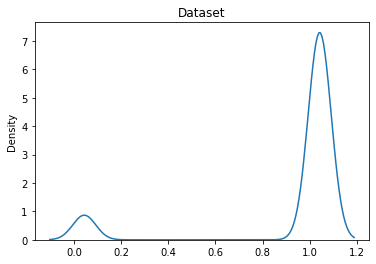

In [3]:
sns.kdeplot(data)
plt.title('Dataset')

2. Se define la distancia/métrica

In [4]:
# Distance function - Absolute difference 
def distance_function(X,Y):
    distance = (1/len(X))*abs(sum(X)-sum(Y))
    return distance

3. Se define un modelo para generar datos, en este caso una distribución binomial$(n, p=\theta)$.
4. Se establece un umbral y un número máximo de muestras.

In [5]:
# The ABC method with uniform prior, returns samples from the posterior
def ABC_Method_Uniform_Prior(Observed_data, Number_of_Samples, threshold):
    # The observed data 
    # initialise Posterior array
    Posterior_distribution = []
    # trials
    n = len(Observed_data) 
    # loop through to get the samples. 
    for i in range(0, Number_of_Samples):
        distance = threshold+1
        # While the distance is greater than the threshold continue to sample theta from the beta distribution
        while distance > threshold:
            # sample theta from the prior
            theta = np.random.beta(1, 1, size=1)[0]
            # generate the sim data 
            X = np.random.binomial(1, theta, n)
            # calcalute the distance from Y 
            distance = distance_function(X, Observed_data)
        Posterior_distribution.append(theta)
    return Posterior_distribution

5. Se realiza el proceso de inferencia con el conjunto de datos, N muestras y un umbral. 
- La salida es el muestreo de la distribución posterior del parámetro libre $\theta$

In [6]:
sampling = ABC_Method_Uniform_Prior(data, 100, 0.1)

Text(0.5, 0, '$\\theta$')

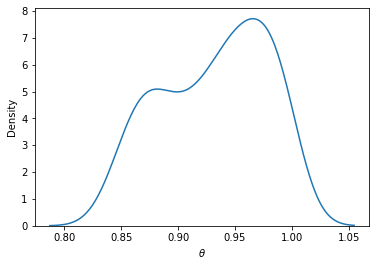

In [7]:
sns.kdeplot(sampling)
plt.xlabel(r'$\theta$')